In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1:

(10 points)

**a)** The file `data_problem1.csv` contains a sequence of observations. In this problem you should do the following:

1. Load the data and split it into 80 % training and 20 % validation data.
2. Pre-process the data as you find appropriate.
3. Produce mean-squared-error curves for model orders in the range $p=1,\dots,10$. Plot both training and validation errors as two separate curves.
4. Based on the error curves, pick a final model order $p$ that you think is appropriate. **Motivate your choice!**


<div style="text-align: right"> (6p) </div>


In [2]:
data = pd.read_csv('data_problem1.csv', header = 0)
y = data['Data'].values

**Solution:**

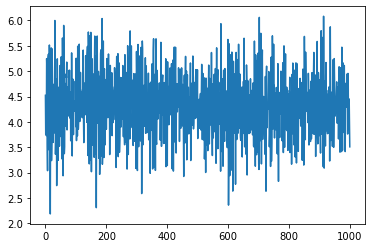

In [3]:
plt.plot(y)
plt.show()

___

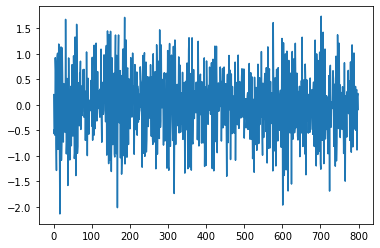

In [4]:
# 1 & 2 ############

n = int(len(y)*0.8)
n
# Detrended
y_mean = np.mean(y)
y = y - y_mean
train = y[:n]
valid = y[n:]

plt.plot(train)
plt.show()

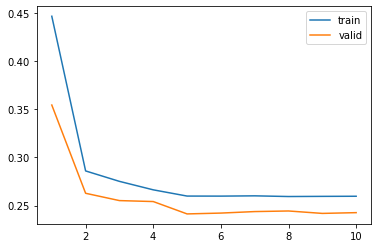

[0.35450049055626714,
 0.2627526146378795,
 0.2551419613875117,
 0.2541505427856418,
 0.24129115029918183,
 0.24216246800269145,
 0.24372771614116817,
 0.24434261041984176,
 0.241824590767094,
 0.24261090384865713]

In [5]:
# 3 ###############
from tssltools import fit_ar, predict_ar_1step

mse_train = []
mse_valid = []

for i in range(10):
   # print(i)
    p = i + 1
    theta = fit_ar(y = train, p = p)
    pred_train = predict_ar_1step(theta = theta, y_target = train)
    pred_valid = predict_ar_1step(theta = theta, y_target = valid)
    
    mse_train.append(np.mean((train[p:] - pred_train)**2))
    mse_valid.append(np.mean((valid[p:] - pred_valid)**2))


x_values = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x_values,mse_train, label = "train")
plt.plot(x_values,mse_valid, label = "valid")
plt.legend()
plt.show()
mse_valid

# I would use p = 2 due to the fact that the valid MSE does not 
# decrease much after p = 2 and we dont want a complex model


**b)** Verify that the resulting AR models is stable directly based on the model parameters.
<div style="text-align: right"> (2p) </div>

**Solution:**

In [21]:
p = 5
comp_matrix = np.zeros((p, p))
comp_matrix[0] = fit_ar(y=train, p=p) 
comp_matrix[1:, :-1] = np.eye(p-1)
comp_matrix
eigenvalues = np.linalg.eigvals(comp_matrix)
np.abs(eigenvalues)

array([0.89492995, 0.89492995, 0.62906636, 0.55680038, 0.55680038])

___

**c)** Predict the value of $y_{n+1}$. Where $n$ is the **total number of observations** including both the training and testing data.
<div style="text-align: right"> (2p) </div>

**Solution:**

In [7]:
best_theta = fit_ar(y = train, p = 2)

last_2_values = np.flip(y[-2:]) 

y_n_plus_1 = np.sum(last_2_values * best_theta)

y_n_plus_1 + y_mean


4.55757634227043